In [1]:
#Importing All necessary libraries used in this project

import pandas as pd
import numpy as np
import re
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
#NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS , WordCloud 
#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [3]:
df = pd.read_csv("spam.csv")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df=df.rename(columns={"v1":"label" , "v2":"message"})

In [8]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [10]:
# Get all the ham and spam emails
ham_msg = df[df.label =='ham']
spam_msg = df[df.label=='spam']

In [11]:
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

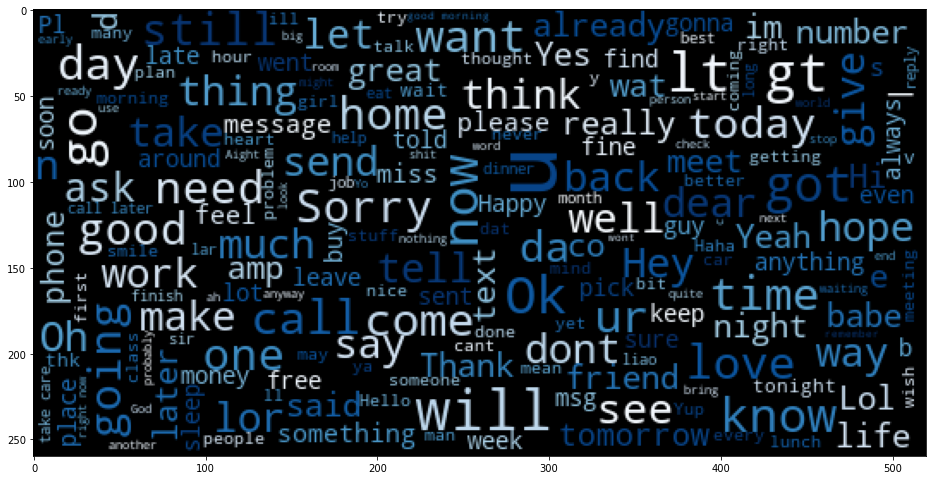

In [12]:
#WordCloud For the Ham Messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud)
plt.show()

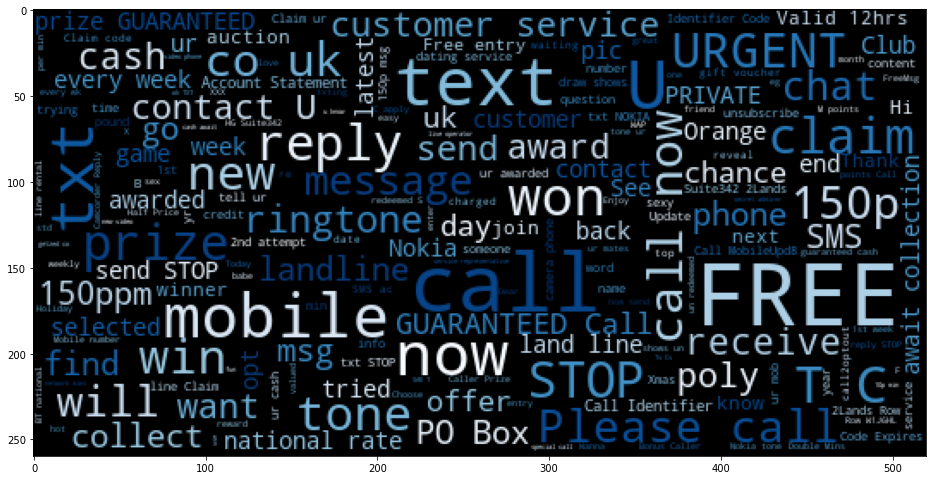

In [13]:
#Worcloud For The Spam Messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud)
plt.show()

C:\Users\ANSH VOHRA\anaconda3\envs\tensor_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

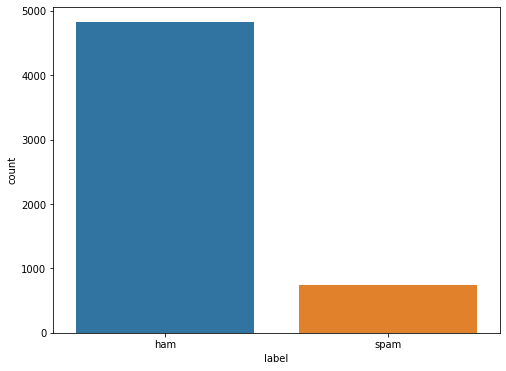

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(df.label)

In [15]:
#percentage of the spam messages
(len(spam_msg)/len(ham_msg))*100

15.481865284974095

In [16]:
stopwords = stopwords.words('english')

In [18]:
df['message']=df['message'].apply(lambda x:re.sub('[.,@#$%*?_]','',x))
df['message']=df['message'].apply(lambda x:word_tokenize(x))
df['message']=df['message'].apply(lambda x:[word for word in x if word not in stopwords])

In [19]:
df.head()

,label,message
0,ham,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,"[Ok, lar, Joking, wif, u, oni]"
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"[Nah, I, n't, think, goes, usf, lives, around,..."


In [20]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

1978    [No, I, 'm, boat, Still, moms, Check, yo, I, '...
3989    [(, Bank, Granite, issues, Strong-Buy, ), EXPL...
3935     [They, r, giving, second, chance, rahul, dengra]
4078    [O, played, smash, bros, &, lt, ;, &, gt, ;, r...
4086    [PRIVATE, !, Your, 2003, Account, Statement, 0...
                              ...                        
3772    [I, came, hostel, I, going, sleep, Plz, call, ...
5191                         [Sorry, I, 'll, call, later]
5226       [Prabhai, 'm, sorydarealyfrm, heart, 'm, sory]
5390                        [Nt, joking, seriously, told]
860                                [In, work, Going, min]
Name: message, Length: 4457, dtype: object

In [21]:
X_train = X_train.apply(lambda x :' '.join(x))

In [22]:
X_train

1978     No I 'm boat Still moms Check yo I 'm half naked
3989    ( Bank Granite issues Strong-Buy ) EXPLOSIVE P...
3935             They r giving second chance rahul dengra
4078        O played smash bros & lt ; & gt ; religiously
4086    PRIVATE ! Your 2003 Account Statement 07973788...
                              ...                        
3772    I came hostel I going sleep Plz call class Hrishi
5191                               Sorry I 'll call later
5226              Prabhai 'm sorydarealyfrm heart 'm sory
5390                             Nt joking seriously told
860                                     In work Going min
Name: message, Length: 4457, dtype: object

In [23]:
t = Tokenizer()
t.fit_on_texts(X_train)

In [24]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)


In [25]:
padded_train = pad_sequences(encoded_train, maxlen=8, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=8, padding='post')
print(padded_test)

[[   4   87 1553 ...  516 2942 1191]
 [ 144  168 1668 ...  997 1708 1075]
 [  19 3379    3 ...  274 7368  161]
 ...
 [  91   60    5 ...   85    0    0]
 [   8 1272    1 ...    0    0    0]
 [2671  161 2295 ...  272    0    0]]


In [26]:
#RandomForest model fitting
model=RandomForestClassifier(n_estimators=100)
model.fit(padded_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=model.predict(padded_test)
acc=accuracy_score(y_pred,y_test)
print(acc*100,"%")

90.22421524663677 %


In [28]:
vocab_size = 50_000
one_hots = [one_hot(word,vocab_size)for word in X_train]
print(one_hots)

[[25451, 8227, 20494, 47284, 4676, 16108, 32388, 38425, 8227, 20494, 3018, 19623], [46579, 12089, 7636, 49789, 28616, 3854, 17166, 11111, 9468, 28465, 10272, 17544, 32166, 43925, 37807, 14151, 40229, 25663, 5859], [732, 20920, 24068, 3972, 6431, 26714, 18230], [47441, 5065, 24289, 44608, 37330, 40909, 32193], [15531, 5274, 27441, 4339, 15929, 41048, 14616, 42815, 5579, 38925, 3966, 8227, 1162, 10413, 29745, 21107, 44049, 9167, 13138, 40153, 670, 25269, 36640], [20146, 18500, 44041, 12182, 11268, 25916, 12907], [5957, 25440, 5957, 37818, 20699, 25780], [32003, 395, 13308, 24374, 27873, 40094], [14990, 49312, 35271], [38966, 47462, 28694, 23435, 23490, 40309, 25322], [139, 27110, 35586, 3710], [16188, 12172, 23202, 43769, 32388, 35515, 41192, 21322], [8227, 20494, 14105, 26864, 14715, 11485], [24037], [16732, 46966, 22255, 41318, 32718, 40727, 38618, 26864, 28672], [850, 19366, 120, 18088, 42314, 40399, 26992, 9419, 11015, 35619, 30758, 17157, 28998, 14707, 18088, 39961, 44789, 7507, 293

In [29]:
padded = pad_sequences(one_hots, padding ='post' , maxlen=5)
print(padded)

[[38425  8227 20494  3018 19623]
 [37807 14151 40229 25663  5859]
 [24068  3972  6431 26714 18230]
 ...
 [20494 36186 28615 20494 17562]
 [28658 37574 17749 38893     0]
 [48486 22207 38618 12626     0]]


In [30]:
model = Sequential()
model.add(Embedding(vocab_size,50))
model.compile("adam" , "mse")

In [31]:
predict = model.predict(padded)

In [32]:
predict.shape

(4457, 5, 50)